## Partner: Brandon Keck
## Partner: Sam Bisbee
## Partner: Pierce Rexford

Our project set out to comprehensively analyze the performance of baseball players utilizing a combination of statistical methods and machine learning techniques. Leveraging a comprehensive dataset ('bat2022') containing diverse player metrics, our focus centered on key performance indicators such as stolen bases (SB), at-bats (AB), home runs (HR), and hits (H) to predict a player's ROTO score, a pivotal metric in baseball assessment.
Our journey began with an in-depth exploration of the dataset's characteristics. We commenced by calculating the mean number of games played, which stood at 72.55. This initial step allowed us to gain insights into the dataset's structure and refine our focus for subsequent analyses. To adhere to MLB's regulations (Rule 9.22 and Rule 10.22), we meticulously curated a new DataFrame named 'minatbats,' ensuring compliance with stipulated guidelines. By incorporating these rules, we could ascertain the minimum number of at-bats required for a player to qualify in a given season, culminating in a threshold of 223 at-bats.
Subsequently, we delved into uncovering intricate relationships between various performance metrics through the generation of a correlation matrix. This analytical endeavor provided illuminating insights into the interplay among different factors, notably highlighting correlations between ROTO and runs batted in (RBI), as well as ROTO and hits (H). Visualizing these correlations using a heatmap facilitated a nuanced understanding of the dataset's dynamics, enhancing our ability to discern underlying patterns and trends.
A pivotal aspect of our analysis involved clarifying how baseball performance metrics varied across different player positions. This was achieved through the creation of a scatterplot matrix, visually portraying the relationship between performance metrics and player positions. By comparing metrics against positional data, we gained valuable insights into how player roles influenced performance metrics, fostering a deeper comprehension of positional dynamics within the sport.
Transitioning from exploratory analyses to predictive modeling, we embarked on model development endeavors aimed at forecasting ROTO scores. Commencing with a train-test split, we partitioned the dataset into training and testing sets, facilitating robust model evaluation. Employing a basic linear regression model yielded commendable accuracy, with an impressive R-squared value of 0.987. To validate the model's generalizability, we employed k-fold cross-validation, affirming consistent performance with a mean cross-validation score mirroring the initial model's accuracy. Furthermore, we explored Ridge regression as an alternative approach, yielding comparable results to the baseline linear regression model.
In conclusion, our analysis underscores the efficacy of selected performance metrics, such as stolen bases, at-bats, home runs, and hits, as potent predictors of a player's ROTO score. The developed linear regression models, bolstered by rigorous cross-validation, offer reliable prognostications of player performance, thereby furnishing valuable insights for player evaluation and team management in baseball. Looking ahead, further refinement and exploration of additional variables hold promise for enhancing the predictive efficacy of our models, facilitating more precise player assessments and strategic decision-making in the realm of baseball management.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras as keras
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Brandons data step
#data = '/content/drive/MyDrive/Notability/Spring 2024/CS 385/bat2022.csv'

#bat2022 = pd.read_csv(data)

In [ ]:
#Sams data step
data = '/content/drive/MyDrive/SSU/CS 385/CS 385 Data/bat2022.csv'

bat2022 = pd.read_csv(data)

In [ ]:
# Pierce's data step
#data = '/content/drive/MyDrive/bat2022.csv'

#bat2022 = pd.read_csv(data)

In [ ]:
bat2022.head()

,playerID,nameFirst,nameLast,bats,throws,age,year,stints,teamID,lg,...,g2,pos3,g3,pos4,g4,pos5,g5,mlbam_id,baseball_prospectus_id,n2022
0,abramcj01,CJ,Abrams,L,R,21.0,2022,2,WAS,NL,...,13.0,OF,3.0,NaN,NaN,NaN,NaN,ABRAMS20001003A,682928.0,1530.0
1,abreujo02,Jose,Abreu,R,R,35.0,2022,1,CHA,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABREU19870129A,547989.0,387.0
2,acunaro01,Ronald,Acuna,R,R,24.0,2022,1,ATL,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACUNA19971218A,660670.0,1569.0
3,adamewi01,Willy,Adames,R,R,26.0,2022,1,MIL,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADAMES19950902A,642715.0,1480.0
4,adamsri03,Riley,Adams,R,R,26.0,2022,1,WAS,NL,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,ADAMS19960626A,656180.0,1363.0


#Some players only play a few games per season, lets check the MLB rules for which players we should look at.

#Rule 9.22

#Rule 10.22

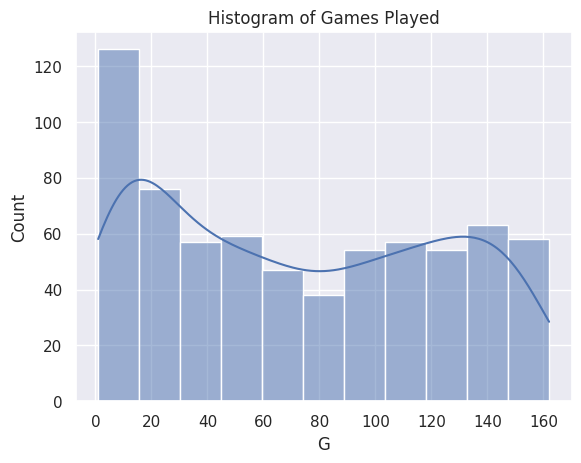

In [ ]:
#Histogram of Games
sns.histplot(data=bat2022, x='G', kde=True)
plt.title('Histogram of Games Played')
plt.show()

#We decided to create a histogram of the amount of games played in order to visualize the disbursement of games played by players for the data. We realized however, that a large number of players played less than 20 games. We do not want to have those in our dataset and so we decided to create a new dataframe called MinatBat. We looked at the mean number of games played which turned out to be 72.5. We then used MLB rules 9.22 and 10.22 to calculate the average number of at bats a player to have would be 223.2.

In [ ]:
games_mean=bat2022['G'].mean()

print(games_mean)


72.54862119013062


#MinatBat():  Due to the number of players that played such a low number of games, we decided that we needed to create a data set that would only contain players that had a large enough sample size. The reason for this is because it was challenging to predict some of the players that played few games because they didn’t have enough at bats to get a good average. We used rules 9.22 and 10.22 which state that in order for a player to be eligible for a batting title they must have at least 502 at bats, which is an average of 3.1 at bats a game. We then took the average number of games played for players in our data set which was 72, and multiplied that number by 3.1 to get 223 at bats, which was the requirement for our minatbats() data frame. Therefore, all of the players in the minatbats() data frame have 223 at bats or more.

In [ ]:
minatbat=bat2022[bat2022['AB']>=223.2]
print(minatbat)

      playerID  nameFirst     nameLast bats throws   age  year  stints teamID  \
0    abramcj01         CJ       Abrams    L      R  21.0  2022       2    WAS   
1    abreujo02       Jose        Abreu    R      R  35.0  2022       1    CHA   
2    acunaro01     Ronald        Acuna    R      R  24.0  2022       1    ATL   
3    adamewi01      Willy       Adames    R      R  26.0  2022       1    MIL   
5    adelljo01         Jo        Adell    R      R  23.0  2022       1    LAA   
..         ...        ...          ...  ...    ...   ...   ...     ...    ...   
677   wittbo02      Bobby         Witt    R      R  22.0  2022       1    KCA   
680   wongko01     Kolten         Wong    L      R  31.0  2022       1    MIL   
682  yastrmi01       Mike  Yastrzemski    L      L  32.0  2022       1    SFN   
683  yelicch01  Christian       Yelich    L      R  30.0  2022       1    MIL   
684  yepezju01       Juan        Yepez    R      R  24.0  2022       1    STL   

     lg  ...    g2  pos3   

In [ ]:
# Check for null values in the entire DataFrame
print(minatbat.isnull().sum())

playerID                    0
nameFirst                   0
nameLast                    0
bats                        0
throws                      0
age                         0
year                        0
stints                      0
teamID                      0
lg                          0
G                           0
tap                         0
AB                          0
R                           0
H                           0
DB                          0
TR                          0
HR                          0
RBI                         0
SB                          0
CS                          0
BB                          0
SO                          0
IBB                         0
hpb                         0
SH                          0
SF                          0
GIDP                        0
avg                         0
obp                         0
slg                         0
woba                        0
PRO                         0
GURU      

<Axes: >

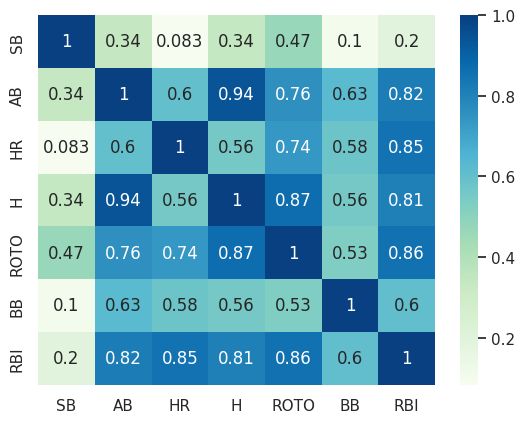

In [ ]:
##Correlation Matrix
minatbatnum = minatbat.select_dtypes(include=['number'])
select = ['SB', 'AB', 'HR', 'H', 'ROTO', 'BB', 'RBI']
minatbatnum = minatbatnum[select]
matrix = minatbatnum.corr()

#plotting correlation matrix
sns.heatmap(matrix, cmap="GnBu", annot=True)

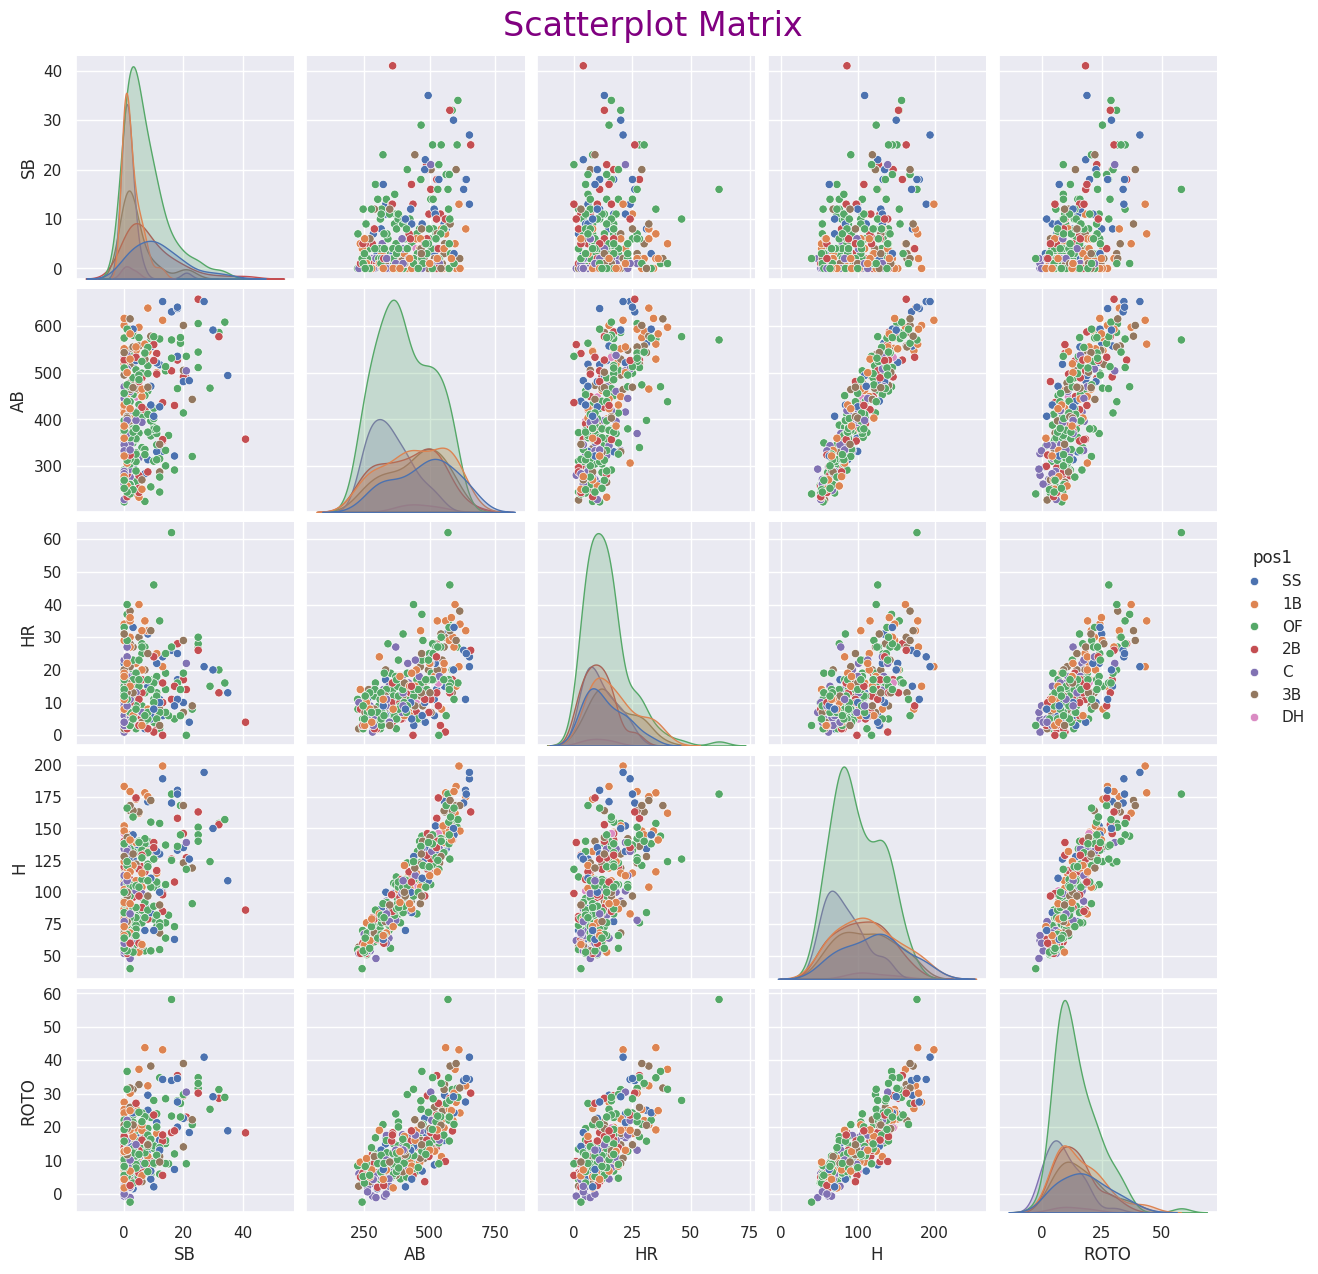

In [ ]:
selected_columns = ['SB', 'AB', 'HR', 'H', 'ROTO']
minatbat_subset = minatbat[selected_columns + ['pos1']]

pairplot = sns.pairplot(minatbat_subset, hue='pos1')

# Set the title at the top
pairplot.fig.suptitle('Scatterplot Matrix', fontsize=24, color='purple', y=1.02)

plt.show()

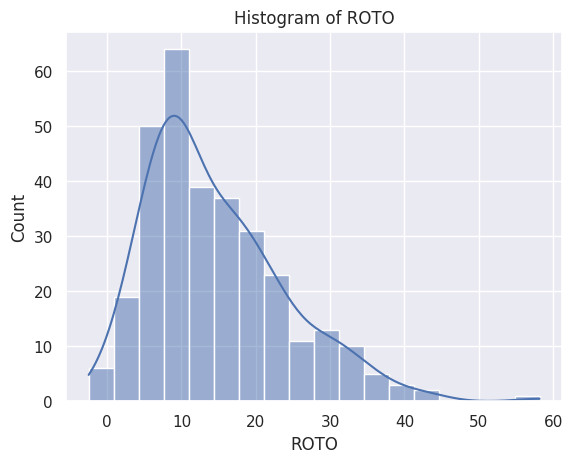

In [ ]:
#histogram of roto

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of ROTO
sns.histplot(data=minatbat_subset, x='ROTO', kde=True)
plt.title('Histogram of ROTO')
plt.show()

<Figure size 640x480 with 0 Axes>

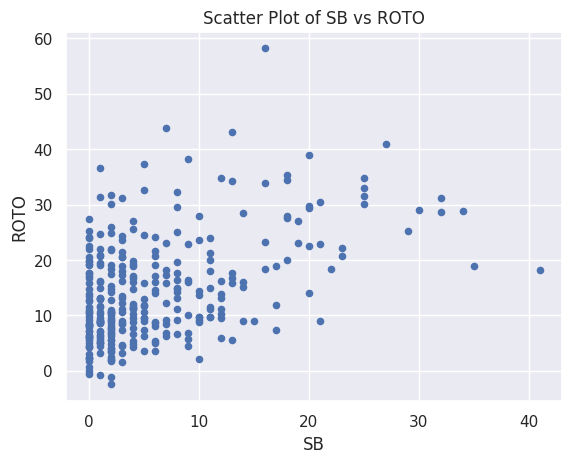

<Figure size 640x480 with 0 Axes>

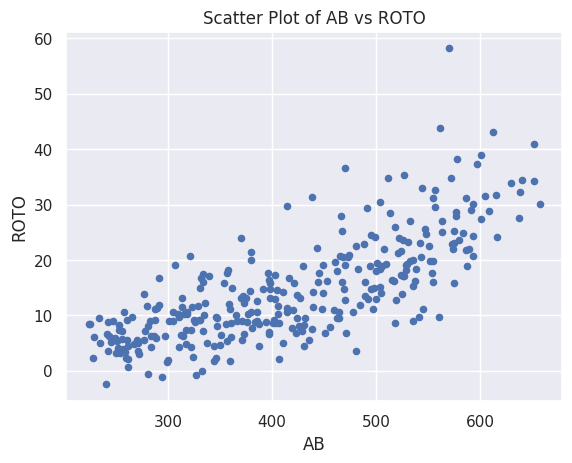

<Figure size 640x480 with 0 Axes>

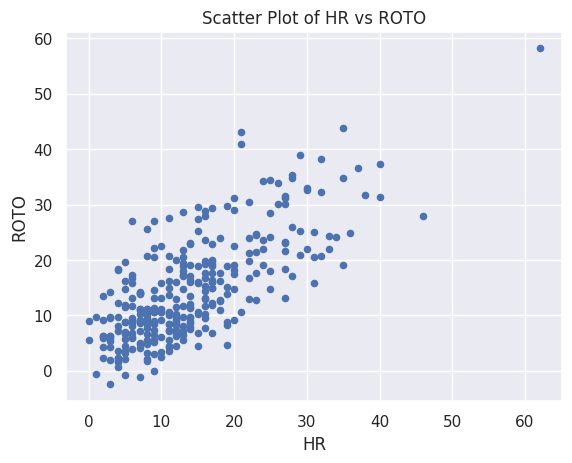

<Figure size 640x480 with 0 Axes>

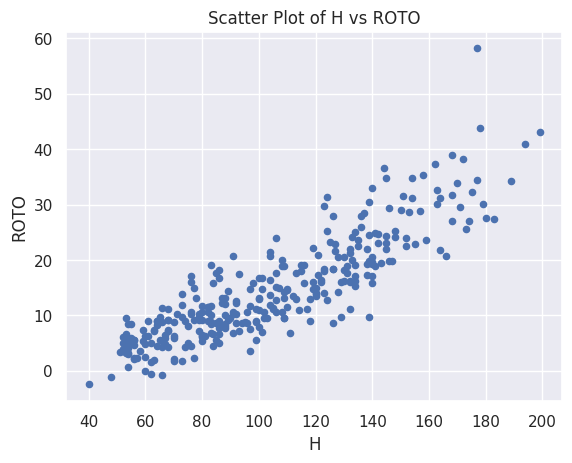

<Figure size 640x480 with 0 Axes>

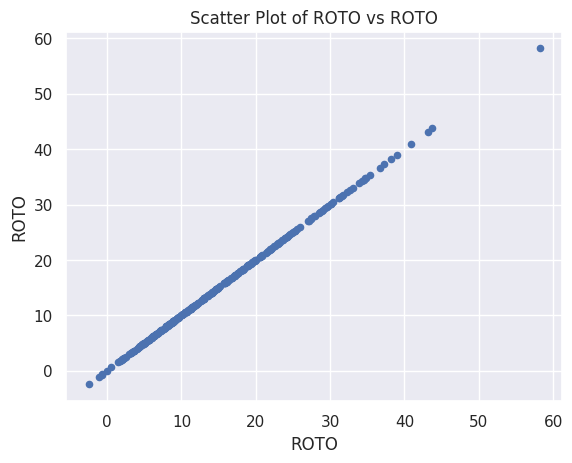

<Figure size 640x480 with 0 Axes>

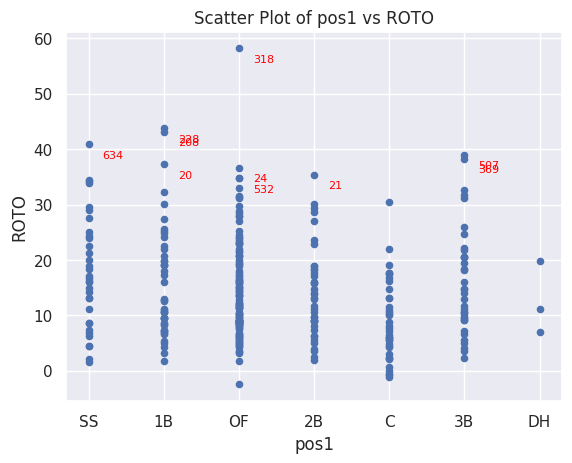

In [ ]:
#Individual scatterplots of ROTO
for cname in minatbat_subset.columns:
    plt.figure()  # Create a new figure for each scatter plot
    ax = minatbat_subset.plot.scatter(x=cname, y='ROTO')
    plt.title(f'Scatter Plot of {cname} vs ROTO')
    plt.xlabel(cname)
    plt.ylabel('ROTO')


#Identify and annotate outliers
outliers = minatbat_subset[minatbat_subset['ROTO'] > minatbat_subset['ROTO'].quantile(0.97)]  # Example: using 99th percentile as threshold
for i, row in outliers.iterrows():
  ax.annotate(i, (row[cname], row['ROTO']), xytext=(10,-10), textcoords='offset points', fontsize=8, color='red')

plt.show()

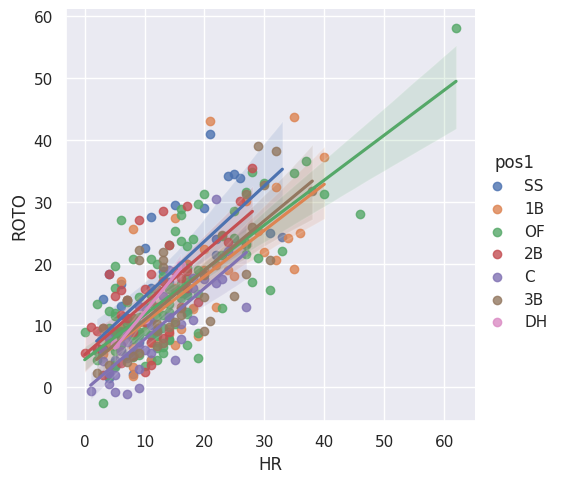

In [ ]:
#Plotting Home Runs vs. ROTO, colored by position
sns.lmplot(data=minatbat, x="HR", y="ROTO", hue="pos1")

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

X = minatbat[['SB', 'AB', 'HR', 'H']]
y = minatbat['ROTO']

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42,
                                   test_size = 0.25,
                                   shuffle=True)
#print(X_test)
print(y_test)

285    10.56
67     19.35
509    30.44
132    17.48
568     9.05
       ...  
239     8.90
645    13.09
134     6.56
381    13.60
11      8.92
Name: ROTO, Length: 79, dtype: float64


In [ ]:
###Basic Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Instantiate linear regression model
model1 = LinearRegression()

# Fit the model
model1.fit(X, y)

# Predict
y_pred1 = model1.predict(X)

# Calculate metrics
mse1 = mean_squared_error(y, y_pred1)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y, y_pred1)
r21 = r2_score(y, y_pred1)

#Printing Metrics
print("MSE:", mse1)
print("RMSE:", rmse1)
print("MAE:", mae1)
print("R2:", r21)

print("Intercept:", model1.intercept_)

# Get non-zero coefficients and corresponding variable names
non_zero_coeffs1 = model1.coef_
selected_variables1 = [X.columns[i] for i in range(len(non_zero_coeffs1)) if non_zero_coeffs1[i] != 0]
print("Coefficients:", model1.coef_)
print("Selected Variables:", selected_variables1)

MSE: 1.1067847604215757
RMSE: 1.0520383835305516
MAE: 0.8080556565052418
R2: 0.9874297031182395
Intercept: -0.7984371336336302
Coefficients: [ 0.34822223 -0.07583763  0.52878919  0.35956227]
Selected Variables: ['SB', 'AB', 'HR', 'H']


In [ ]:
#Cross Validation Linear model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#X = minatbat[['SB', 'AB', 'HR', 'H']]
#y = minatbat['ROTO']

# Create linear regression model
lrmodel3 = LinearRegression()
lrmodel3.fit(X, y)

# Initialize KFold -- shuffle (randomize) the rows
kfold = KFold(shuffle=True, random_state=42)

# Perform stratified cross-validation
scores = cross_val_score(lrmodel3, X, y, cv=kfold)

# Print the cross-validation scores
print("Kfold")
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())
#Intercepts and coefficients are the same as first model, because base model is the same. Kfold is an accuract evaluation, not a different model

Kfold
Cross-validation scores: [0.98655293 0.99343451 0.98535836 0.98354701 0.98564753]
Mean: 0.9869080649345818
Standard deviation: 0.0034061072348318686


In [ ]:
# Initialize the linear regression model
model5 = LinearRegression()

# Fit the model to the training data
model5.fit(X_train, y_train)

# Predict on the testing data
y_pred5 = model5.predict(X_test)

# Calculate metrics
mse5 = mean_squared_error(y_test, y_pred5)
r25 = r2_score(y_test, y_pred5)

#Print Metrics
print("Mean Squared Error:", mse5)
print("R-squared:", r25)
print("Intercept:", model5.intercept_)

# Get non-zero coefficients and corresponding variable names
non_zero_coeffs5 = model5.coef_
selected_variables5 = [X_train.columns[i] for i in range(len(non_zero_coeffs5)) if non_zero_coeffs5[i] != 0]
print("Coefficients:", model5.coef_)
print("Selected Variables:", selected_variables5)

Mean Squared Error: 1.248572954478201
R-squared: 0.9867491912646169
Intercept: -0.739920873050206
Coefficients: [ 0.34307636 -0.07614281  0.52710215  0.3609065 ]
Selected Variables: ['SB', 'AB', 'HR', 'H']


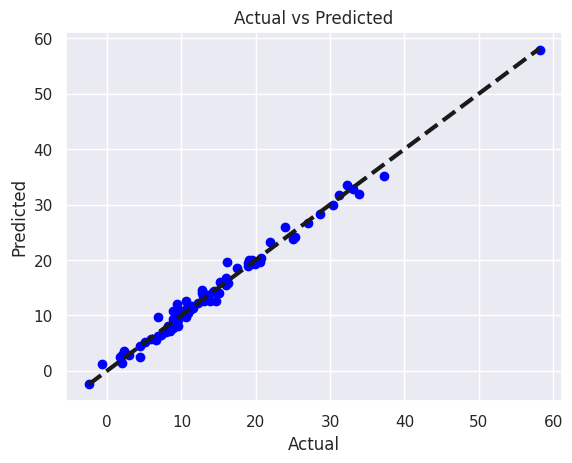

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted
plt.scatter(y_test, y_pred5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

#Initialize Model
y_pred6 = ridge.predict(X_test)

# Calculate metrics
mse6 = mean_squared_error(y_test, y_pred6)
r26 = r2_score(y_test, y_pred6)

#Printing Metrics
print("Mean Squared Error:", mse6)
print("R-squared:", r26)
print("Intercept:", ridge.intercept_)

# Get non-zero coefficients and corresponding variable names
non_zero_coeffs6 = ridge.coef_
selected_variables6 = [X_train.columns[i] for i in range(len(non_zero_coeffs6)) if non_zero_coeffs6[i] != 0]
print("Coefficients:", ridge.coef_)
print("Selected Variables:", selected_variables6)

Mean Squared Error: 1.248650135201388
R-squared: 0.9867483721639009
Intercept: -0.7405719276149902
Coefficients: [ 0.34303812 -0.0761358   0.52704698  0.36089442]
Selected Variables: ['SB', 'AB', 'HR', 'H']


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso = Lasso(alpha=10.0)
lasso.fit(X_train, y_train)

y_pred7 = lasso.predict(X_test)

# Calculate metrics
mse7 = mean_squared_error(y_test, y_pred7)
r27 = r2_score(y_test, y_pred7)

#Print Metrics
print("Mean Squared Error:", mse7)
print("R-squared:", r27)
print("Intercept:", lasso.intercept_)

# Get non-zero coefficients and corresponding variable names
non_zero_coeffs7 = lasso.coef_
selected_variables7 = [X_train.columns[i] for i in range(len(non_zero_coeffs7)) if non_zero_coeffs7[i] != 0]
print("Coefficients:", lasso.coef_)
print("Selected Variables:", selected_variables7)

Mean Squared Error: 10.142814616769154
R-squared: 0.8923567132835869
Intercept: -5.024249560366723
Coefficients: [ 0.09771996 -0.03015089  0.25426921  0.26962995]
Selected Variables: ['SB', 'AB', 'HR', 'H']


#Regular Multiple Linear Regression
##R^2 (Accuracy) = .9874
#KFold CV Multiple Linear Regression
##R^2 (Accuracy) = .9869

#Train-Test Split Multiple Linear Regression

##R^2 (Accuracy) = .9867

#Ridge Regression

##R^2 (Accuracy) = .9867

#Lasso Regression

##R^2 (Accuracy) = .892
##Lasso regression drops all variables whose coefficients are 0, and the remaining ones are used in the model. The only four variables that yielded nonzero coefficients were stolen bases, at-bats, hits, and homeruns, meaning these are very likely to be the four variables used in the calculation of ROTO


#We decided to test our variable selection for reverse engineering ROTO by using them in a neural net model. We expect this model to overfit and overperform, since the variables have autocorrelation with each other and the target variable.

In [ ]:
# This is an improved version of the Neural Nets model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create a pipeline with feature scaling and MLPRegressor
pipeline = make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000, random_state=42))

# Cross-validate the pipeline
mlpcv_scores = cross_val_score(pipeline, X, y, cv=5)


# Print cross-validation scores
print("Cross-Validation Scores:", mlpcv_scores)
print("Mean:", mlpcv_scores.mean())
print("Standard deviation:", mlpcv_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.98360585 0.98698546 0.98817513 0.97515382 0.99025666]
Mean: 0.9848353856578352
Standard deviation: 0.005299273318746117


#After getting an accuracy of 98.4% with 0.5% standard deviation, we see that our prediction is true, and can confirm that the variables: Stolen bases, at-bats, hits, and home runs are the variables used in the calculation of ROTO